<a href="https://colab.research.google.com/github/kdw9687/Capstone/blob/master/nueral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
drive.mount('/content/drive')
import sys
import numpy as np

np.set_printoptions(threshold=sys.maxsize)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file='/content/drive/MyDrive/Colab Notebooks/데이터 판다스용완.csv'

In [ ]:
data=pd.read_csv(file)

In [ ]:
data=data.dropna()

In [ ]:
data.drop(columns=['순번','장르','국적.1','연휴 및 기념일 상영 여부','수상'],inplace=True)
data.set_index('영화명',inplace=True)
target=data['전국 관객수']
target.dropna(inplace=True)
x=data.drop(columns=['전국 매출액','전국 관객수'])
y=target

In [ ]:
for i in range(len(y)):
  if y[i]>7000000:
    y[i]=4
  elif y[i]>5000000 and y[i]<=7000000:
    y[i]=3
  elif y[i]>3000000 and y[i]<=5000000:
    y[i]=2
  elif y[i]>1000000 and y[i]<=3000000:
    y[i]=1
  else:
    y[i]=0
  x=np.array(x)
  y=np.array(y)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=777)

In [ ]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

In [ ]:
model=Sequential()
model.add(Dense(64, activation='relu',input_shape=(36,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(x_train,y_train,epochs=30,batch_size=40,validation_data=(x_val,y_val))

Epoch 1/30
20/20 [==============================] - 1s 23ms/step - loss: 58.2044 - acc: 0.3130 - val_loss: 7.7081 - val_acc: 0.2900
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 5.9485 - acc: 0.3961 - val_loss: 4.6681 - val_acc: 0.4800
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 3.7441 - acc: 0.4772 - val_loss: 2.0391 - val_acc: 0.5700
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 1.4497 - acc: 0.5416 - val_loss: 1.4751 - val_acc: 0.5300
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 1.1434 - acc: 0.5711 - val_loss: 1.4014 - val_acc: 0.5550
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 1.0916 - acc: 0.5500 - val_loss: 1.3296 - val_acc: 0.5300
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 1.1814 - acc: 0.5165 - val_loss: 1.3510 - val_acc: 0.4450
Epoch 8/30
20/20 [==============================] - 0s 4ms/step - loss: 1.2230 - acc: 0.

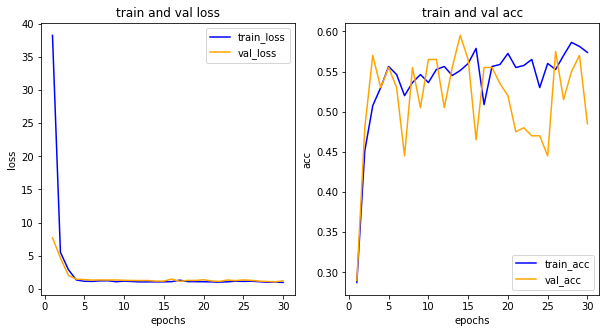

In [ ]:
import matplotlib.pyplot as plt
his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']
epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

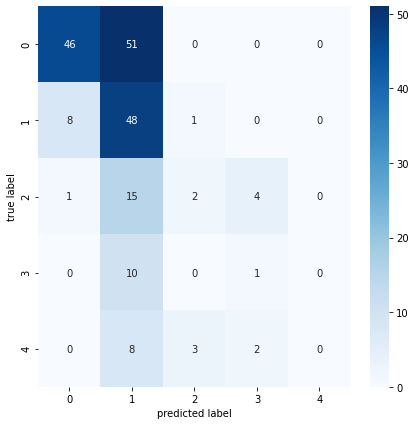

In [ ]:
results=model.predict(x_val)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

plt.figure(figsize=(7,7))
cm=confusion_matrix(np.argmax(y_val,axis=-1),np.argmax(results,axis=-1))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
print('\n',classification_report(np.argmax(y_val,axis=-1),np.argmax(results,axis=-1)))


               precision    recall  f1-score   support

           0       0.84      0.47      0.61        97
           1       0.36      0.84      0.51        57
           2       0.33      0.09      0.14        22
           3       0.14      0.09      0.11        11
           4       0.00      0.00      0.00        13

    accuracy                           0.48       200
   macro avg       0.34      0.30      0.27       200
weighted avg       0.55      0.48      0.46       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
